In [0]:
import json
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

dir = '/content/drive/My Drive/College Stuff/Precision Care Medicine/Code and Stuff/Time-series/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
with open(dir + 'HR_clean.json', 'r') as json_file:
  data = json.load(json_file)

In [0]:
e = pd.read_csv('/content/drive/My Drive/Colab Notebooks/events_train.csv')

In [0]:
%matplotlib inline

In [0]:
p = np.asarray(e['position'])
n = np.asarray(e['name'])
iden = np.asarray(e['ID'])
posp = []
namep = []
posn = []
namen = []
posp_list = []
posn_list = []
timepoints = [0, 25, 50, 75, 100, 120, 140, 145, 149]

In [0]:
for j in range(len(p)):
  if type(p[j]) == float and len(posn) < 4000:
    namen.append(n[j])
    posn.append(200)

In [0]:
for j in range(len(p)):
  if type(p[j]) == str and len(posp) < 4000:
    namep.append(n[j])
    k = 1
    string = ''
    while p[j][k] != ",":
      string = string + p[j][k]
      k += 1
    posp.append(int(string))

In [0]:
for a in range(len(posp)):
  posp_list.append(data[namep[a]][posp[a]-150:posp[a]])

In [0]:
for b in range(len(posn)):
  posn_list.append(data[namen[b]][posn[b]-150:posn[b]])

Timepoint = -150
Number of positive samples is 2500
Number of negative samples is 2500
P value for Mann-Whitney test is 3.192191909691212e-11
P value for Independent T-test is 7.660871475304404e-10
STATISTICALLY SIGNIFICANT DIFFERENCE
Proportion of patients with both positive and negative samples 0.4212
 
Timepoint = -125
Number of positive samples is 2500
Number of negative samples is 2500
P value for Mann-Whitney test is 7.617242325816245e-12
P value for Independent T-test is 5.568997672775582e-11
STATISTICALLY SIGNIFICANT DIFFERENCE
Proportion of patients with both positive and negative samples 0.4244
 
Timepoint = -100
Number of positive samples is 2500
Number of negative samples is 2500
P value for Mann-Whitney test is 5.716976735239079e-11
P value for Independent T-test is 3.155148129216277e-10
STATISTICALLY SIGNIFICANT DIFFERENCE
Proportion of patients with both positive and negative samples 0.4312
 
Timepoint = -75
Number of positive samples is 2500
Number of negative samples i

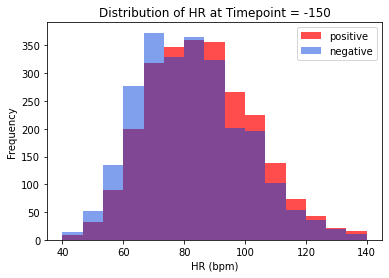

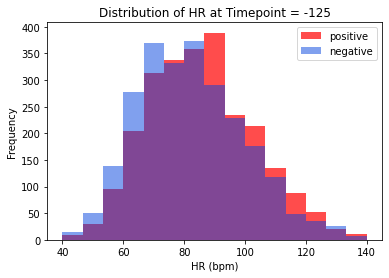

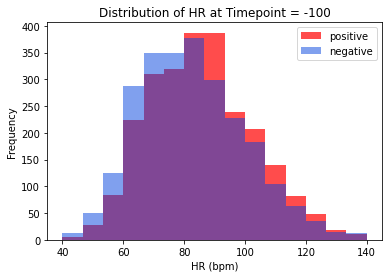

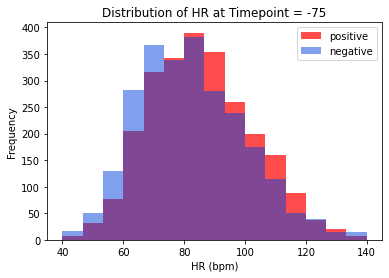

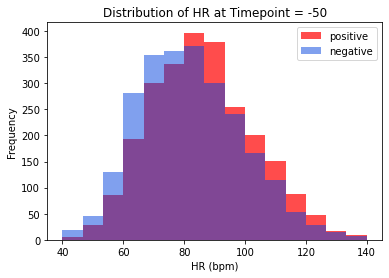

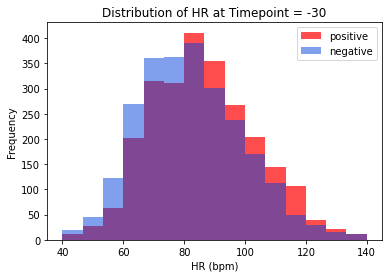

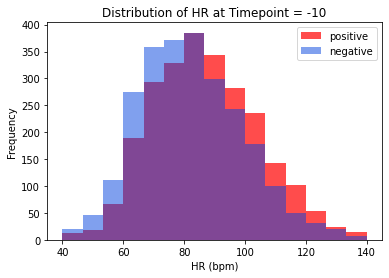

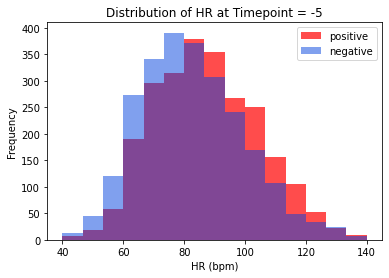

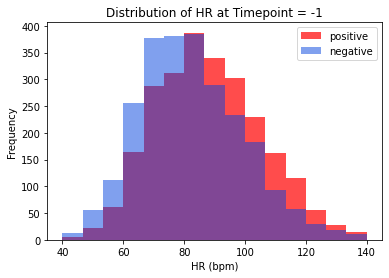

In [23]:
for tp in timepoints:
  p_means = []
  p_sem = []
  p_std = []
  p_hold = []
  p_pats = []
  for thing in range(tp,tp+1):
    for thing2 in range(len(posp_list)):
      if (len(posp_list[thing2]) > thing):
        if (posp_list[thing2][thing] < 200) and (len(p_hold) < 2500):
          p_hold.append(posp_list[thing2][thing])
          p_pats.append(iden[thing2]) 
  n_means = []
  n_sem = []
  n_std = []
  n_hold = []
  n_pats = []
  for thing in range(tp,tp+1):
    for thing2 in range(len(posn_list)):
      if (len(posn_list[thing2]) > thing):
        if (posn_list[thing2][thing] < 200) and (len(n_hold) < 2500):
          n_hold.append(posn_list[thing2][thing])
          n_pats.append(iden[thing2])
  print('Timepoint =',tp-150)
  print('Number of positive samples is',len(p_hold))
  print('Number of negative samples is',len(n_hold))
  stat1, p1 = stats.mannwhitneyu(p_hold, n_hold)
  print('P value for Mann-Whitney test is',p1)
  stat2, p2 = stats.ttest_ind(p_hold, n_hold, axis=0, equal_var=False)
  print('P value for Independent T-test is',p2)
  if (p1<0.01 and p2<0.01):
    print('STATISTICALLY SIGNIFICANT DIFFERENCE')
  else:
    print('NO SIGNIFICANT DIFFERENCE')
  p_hold = np.asarray(p_hold)
  n_hold = np.asarray(n_hold)
  id_both = list(set(p_pats) & set(n_pats))
  both = len(id_both)
  neg = len(n_pats)
  pos = len(p_pats)
  print('Proportion of patients with both positive and negative samples',both/neg)
  print(' ')
  plt.figure()
  plt.hist(p_hold, bins=15, alpha=0.7, range=(40,140), color='red')
  plt.hist(n_hold, bins=15, alpha=0.5, range=(40,140), color='xkcd:blue')
  plt.title('Distribution of HR at Timepoint = '+str(tp-150))
  plt.xlabel('HR (bpm)')
  plt.ylabel('Frequency')
  plt.legend(['positive', 'negative'])